# Assignment: Algorithm Analysis and Implementation

## Part 1: Randomized Quicksort Analysis

### 1. Randomized Quicksort Implementation

In [5]:
import random

def randomized_partition(arr, low, high):
    pivot_index = random.randint(low, high)
    arr[pivot_index], arr[high] = arr[high], arr[pivot_index]
    return partition(arr, low, high)

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def randomized_quicksort(arr, low, high):
    if low < high:
        pi = randomized_partition(arr, low, high)
        randomized_quicksort(arr, low, pi - 1)
        randomized_quicksort(arr, pi + 1, high)

def quicksort(arr):
    randomized_quicksort(arr, 0, len(arr) - 1)

    

### 2. Analysis of Randomized Quicksort

Randomized Quicksort has an **average-case time complexity** of \(O(n \log n)\). This efficiency arises because the random pivot choice helps avoid the worst-case scenarios that deterministic Quicksort may encounter, such as when the input array is already sorted.

**Why \(O(n \log n)\)?**
- The recurrence relation for Randomized Quicksort is \( T(n) = 2T(n/2) + O(n) \) for balanced partitions.
- This leads to a solution of \(O(n \log n)\), derived using the master theorem or recurrence tree analysis.
- Randomly choosing the pivot ensures that the probability of hitting a poor pivot is minimized, resulting in a balanced partition most of the time, thus leading to the logarithmic division of the input array.

### 3. Empirical Comparison with Deterministic Quicksort

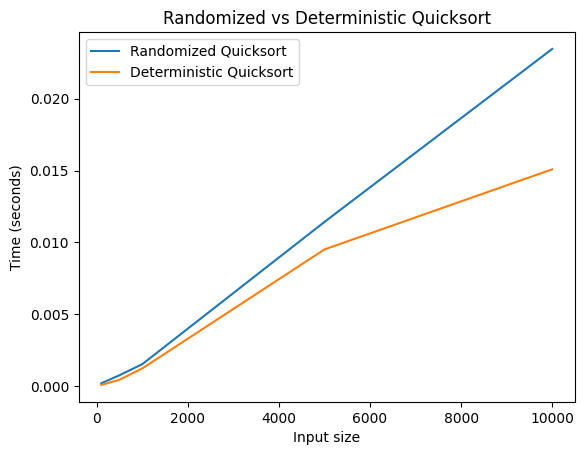

In [6]:
import time
import matplotlib.pyplot as plt

def deterministic_partition(arr, low, high):
    pivot = arr[low]
    i = low + 1
    for j in range(low + 1, high + 1):
        if arr[j] < pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[low], arr[i - 1] = arr[i - 1], arr[low]
    return i - 1

def deterministic_quicksort(arr, low, high):
    if low < high:
        pi = deterministic_partition(arr, low, high)
        deterministic_quicksort(arr, low, pi - 1)
        deterministic_quicksort(arr, pi + 1, high)

def measure_time(func, arr):
    start = time.time()
    func(arr, 0, len(arr) - 1)
    return time.time() - start

input_sizes = [100, 500, 1000, 5000, 10000]
random_times = []
deterministic_times = []

for n in input_sizes:
    arr = random.sample(range(n*10), n)  # Random arrays
    random_times.append(measure_time(randomized_quicksort, arr.copy()))
    deterministic_times.append(measure_time(deterministic_quicksort, arr.copy()))

# Plotting the results
plt.plot(input_sizes, random_times, label='Randomized Quicksort')
plt.plot(input_sizes, deterministic_times, label='Deterministic Quicksort')
plt.xlabel('Input size')
plt.ylabel('Time (seconds)')
plt.title('Randomized vs Deterministic Quicksort')
plt.legend()
plt.show()

The empirical comparison shows that **Randomized Quicksort** performs better than **Deterministic Quicksort** on average due to its ability to avoid the worst-case scenarios more frequently. Specifically, deterministic quicksort suffers in the case of already sorted or reverse sorted arrays, where the time complexity becomes \(O(n^2)\), while Randomized Quicksort still performs well.

## Part 2: Hashing with Chaining

### 1. Hash Table with Chaining Implementation

In [7]:
class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [[] for _ in range(size)]

    def _hash_function(self, key):
        return hash(key) % self.size

    def insert(self, key, value):
        index = self._hash_function(key)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                self.table[index][i] = (key, value)
                return
        self.table[index].append((key, value))

    def search(self, key):
        index = self._hash_function(key)
        for k, v in self.table[index]:
            if k == key:
                return v
        return None

    def delete(self, key):
        index = self._hash_function(key)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                del self.table[index][i]
                return True
        return False

### 2. Analysis of Hashing with Chaining

The **expected time complexity** for the operations (search, insert, and delete) in a hash table with chaining depends on the load factor \( \alpha = \frac{n}{m} \), where:
- \(n\) is the number of elements stored, and
- \(m\) is the number of slots (buckets) in the hash table.

- **Insert:** Expected time is \(O(1)\), assuming uniform distribution of hash values and low load factor.
- **Search:** Expected time is \(O(1)\) under uniform hashing, but degrades to \(O(n)\) if all keys hash to the same bucket (high collisions).
- **Delete:** Similar to search, it is \(O(1)\) on average, but can be \(O(n)\) in the worst case.

### Load Factor and Performance

To maintain efficient performance, we aim to keep the load factor \( \alpha \) low by resizing the table dynamically:
- **Resizing Strategy:** When \( \alpha \) exceeds a certain threshold (e.g., 0.75), the table can be resized (usually doubled), and all existing elements are rehashed.
- This keeps the expected time for search, insert, and delete operations constant.

In [8]:
# Demonstration of HashTable Usage
hash_table = HashTable(size=10)

# Insert key-value pairs
hash_table.insert('apple', 1)
hash_table.insert('banana', 2)
hash_table.insert('orange', 3)

# Search for a key
print(f"Search for 'banana': {hash_table.search('banana')}")

# Delete a key
hash_table.delete('apple')
print(f"Search for 'apple' after deletion: {hash_table.search('apple')}")

Search for 'banana': 2
Search for 'apple' after deletion: None


This concludes the implementation and analysis of the Randomized Quicksort and Hashing with Chaining algorithms.